# HW1

> Name: Liujia Yu
> 
> Github Username: LesleyYu
> 
> USC ID: 4764432021

## Q1 Exploratory Data Analysis

In [5]:
# import python libraries
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

## 1.1 Data Sanity

In [6]:
df = pd.read_csv("./data_la_happiness.csv")
df

,TRACT,meanHSize,percent_bachelorPlus,totalRace1,totalRace2,meanvalence
0,1011.10,2.87,19.4,2319,1244,5.863903
1,1011.22,2.70,27.2,2175,304,5.963174
2,1012.10,2.53,16.6,2078,2434,5.623312
3,1012.20,2.49,19.8,1370,509,5.687386
4,1013.00,2.84,31.0,3116,365,5.687331
...,...,...,...,...,...,...
2105,9203.38,3.65,59.8,2728,738,5.877809
2106,9203.39,3.25,55.5,3367,808,5.888279
2107,9301.01,NaN,64.9,98,27,5.713390
2108,9302.00,2.43,30.6,240,117,5.820676


#### Handling Missing Values

As implemented and printed below, there are **5** missing values in `meanHSize` and **10** missing values in `percent_bachelorPlus`.

I handle these missing values by using the calculated mean values of the known data points. It is implemented in `Scikit-Learn` package.

**References:**

1. [pandas.DataFrame.mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean)
2. [Scikit-Learn SimpleImputer](https://scikit-learn.org/1.6/modules/generated/sklearn.impute.SimpleImputer.html)

In [7]:
# Handling Missing Values
print("Initial missing values in data set:")
print(df.isnull().sum(), '\n')

# start imputing by using calculated mean value
values = df.values # retrieve the numpy array
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imputer.fit_transform(values)  # transform the dataset
# count nan values left
print("Missing: " , np.isnan(transformed_values).sum())

df = pd.DataFrame(transformed_values, columns=df.columns)
df

Initial missing values in data set:
TRACT                    0
meanHSize                5
percent_bachelorPlus    10
totalRace1               0
totalRace2               0
meanvalence              0
dtype: int64 

Missing:  0


,TRACT,meanHSize,percent_bachelorPlus,totalRace1,totalRace2,meanvalence
0,1011.10,2.870000,19.4,2319.0,1244.0,5.863903
1,1011.22,2.700000,27.2,2175.0,304.0,5.963174
2,1012.10,2.530000,16.6,2078.0,2434.0,5.623312
3,1012.20,2.490000,19.8,1370.0,509.0,5.687386
4,1013.00,2.840000,31.0,3116.0,365.0,5.687331
...,...,...,...,...,...,...
2105,9203.38,3.650000,59.8,2728.0,738.0,5.877809
2106,9203.39,3.250000,55.5,3367.0,808.0,5.888279
2107,9301.01,3.180024,64.9,98.0,27.0,5.713390
2108,9302.00,2.430000,30.6,240.0,117.0,5.820676


#### Report mean and medians

In [8]:
# df_stats = pd.DataFrame([], columns=df.columns)

# def calculate_mean_median(df):
stats_data = []
for stat_name, stat_func in [('mean', np.mean), ('median', np.median)]:
    row = []
    for feature in df.columns[1:5]:
        series = np.array(df[feature])
        value = stat_func(series)
        row.append(value)
    stats_data.append(row)

df_stats = pd.DataFrame(stats_data, index = ['mean', 'median'], columns=df.columns[1:5])
df_stats

,meanHSize,percent_bachelorPlus,totalRace1,totalRace2
mean,3.180024,28.859333,988.572038,1607.534597
median,3.130000,23.700000,636.500000,1450.000000


## 1.2 Outlier Detetion

#### Boxplot visualization of `meanvalence`

**References:**
1. [matplotlib.pyplot Doc](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

Text(0, 0.5, 'Mean Valence')

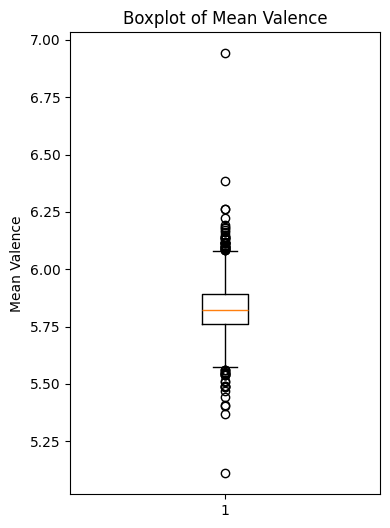

In [9]:
plt.figure(figsize=(4, 6))
plt.boxplot(df['meanvalence']) # , notch=True
plt.title('Boxplot of Mean Valence')
plt.ylabel("Mean Valence")

#### IQR Outlier Removal

In [10]:
# calculate Q1, Q3, IQR
Q1 = df['meanvalence'].quantile(0.25)
Q3 = df['meanvalence'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df_removed = df[(df['meanvalence'] >= lower) & (df['meanvalence'] <= upper)]

# print ourcome
print(f"Original dataset: {len(df)} rows.")
print(f"Outlier removed dataset: {len(df_removed)} rows.")

Original dataset: 2110 rows.
Outlier removed dataset: 2050 rows.


## 1.3 Variable Relationships

**References:**

1. [seaborn.pairplot Doc](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

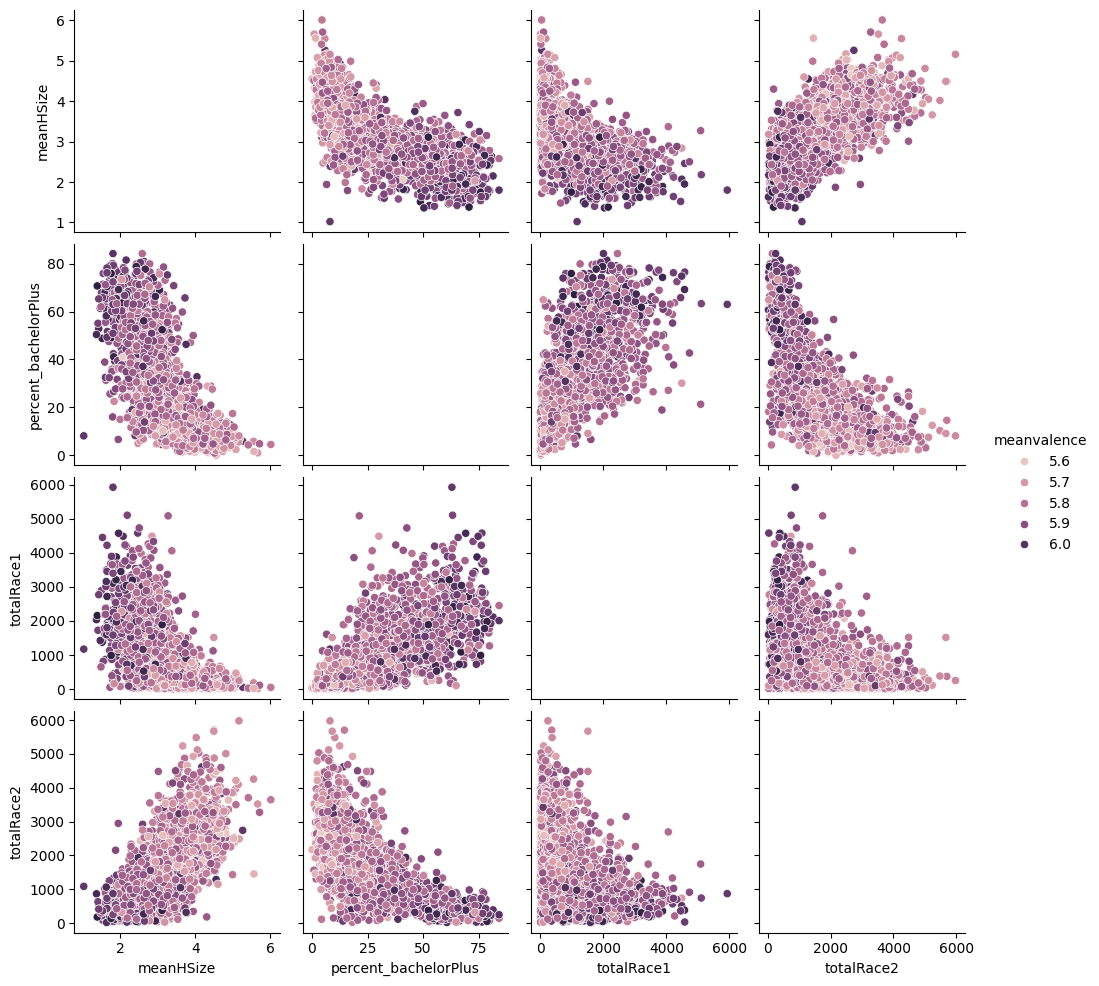

In [18]:
# remove tract column, compare only the 4 features
df_features = df_removed.iloc[:, 1:6]
sns.pairplot(data=df_features, hue='meanvalence')

#### Correlations between variables
* Positive correlation between `meanHSize` and `totalRace1`, `totalRace2`
* Negative correlation between `percent_bachelorPlus` and `totalRace1`, `totalRace2`
* Positive correlation between `meanvalence` and `percent_bachelorPlus`

#### Distributions of `totalRace1` and `totalRace2`
The distributions of `totalRace1` and `totalRace2` appear right-skewed, indicating a large number of census tracts with relatively low values for these features.

Larger household sizes are associated with higher populations of races 1 and 2
Higher education levels (percent_bachelorPlus) are associated with lower populations of races 1 and 2
Higher education levels are positively correlated with happiness (meanvalence)

## 1.4 Simple Models and Residual Analysis

## 1.5 Log Transformation

# 2. Multivariate Regression

## 2.1 Model Building

## 2.2 Scatterplot Analysis

## 2.3 Correlation Heatmap

# 3. Analysis Bias in the Model

## 3.1 Protected Variable Analysis